In [13]:
import pandas as pd

# Load file CSV yang sudah Anda upload
df = pd.read_csv('/content/mental_health.csv')  #   Sesuaikan path jika berbeda


In [8]:
import re
import string
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Pembersihan teks
def clean_text(text):
    text = text.lower()  # huruf kecil semua
    text = re.sub(r"\d+", "", text)  # hapus angka
    text = text.translate(str.maketrans("", "", string.punctuation))  # hapus tanda baca
    text = re.sub(r"\s+", " ", text)  # hilangkan spasi berlebih
    return text.strip()

df['clean_text'] = df['text'].apply(clean_text)

# TF-IDF Vectorizer
vectorizer = TfidfVectorizer(max_features=3000, stop_words='english')
X = vectorizer.fit_transform(df['clean_text'])  # fitur input
y = df['label']  # label output

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix

nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)

acc_nb = accuracy_score(y_test, y_pred_nb)
cm_nb = confusion_matrix(y_test, y_pred_nb)


In [10]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

acc_knn = accuracy_score(y_test, y_pred_knn)
cm_knn = confusion_matrix(y_test, y_pred_knn)


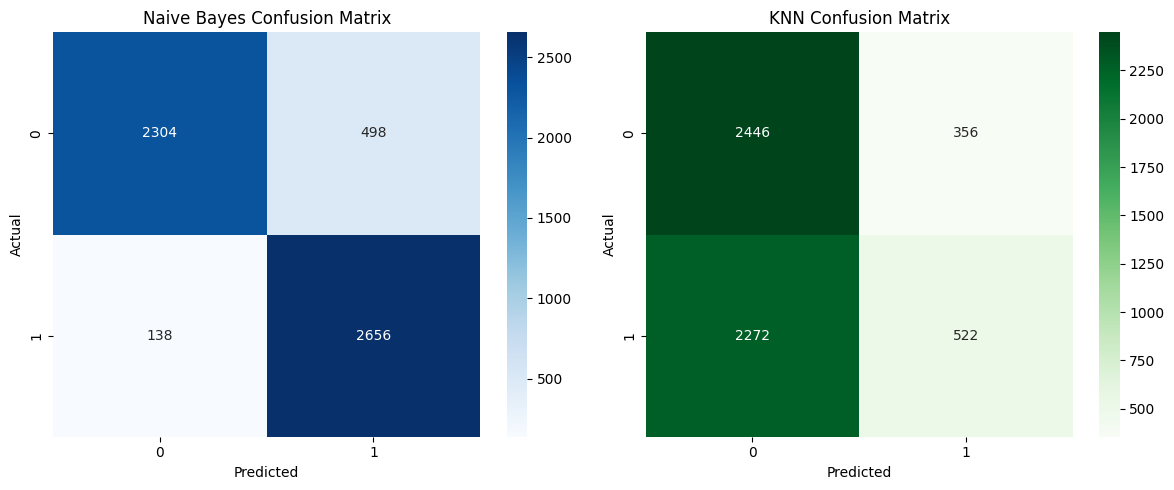

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues')
plt.title("Naive Bayes Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.subplot(1, 2, 2)
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Greens')
plt.title("KNN Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.tight_layout()
plt.show()


In [14]:
# Load the newly uploaded CSV file
file_path = "mental_health.csv"
df = pd.read_csv('/content/mental_health.csv')

# Show basic info and first few rows
df.info(), df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27977 entries, 0 to 27976
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    27977 non-null  object
 1   label   27977 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 437.3+ KB


(None,
                                                 text  label
 0  dear american teens question dutch person hear...      0
 1  nothing look forward lifei dont many reasons k...      1
 2  music recommendations im looking expand playli...      0
 3  im done trying feel betterthe reason im still ...      1
 4  worried  year old girl subject domestic physic...      1)